# <center>CREDIT SCORING </center>
***
### <center>TUNGGAL MANDA ARY TRIYONO</center>

<b>Kasus  :</b> terdapat data pelanggan kredit di suatu negara pada periode Januari-Maret 2015 dengan label 1: Terlambat , 0: Tidak terlambat
                                                                                                     
<b>Tujuan :</b>  membuat model untuk Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

# Import Libraries

In [265]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Variable untuk Modeling

In [284]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

# Load Datasets

In [266]:
df = pd.read_csv('training.csv')

In [267]:
df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### Karakteristik Datasets

In [268]:
df.shape

(16625, 16)

In [269]:
df.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


***
Datasets training terdiri dari 16625 baris dan 16 kolom yang terdiri dari 15 feature dan 1 label. namun feature ID pada data tersebut tidak digunakan untuk analisis
***

### Cek jika ada missing value

In [270]:
df.isnull().sum().sort_values(ascending = False)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
ID           0
dtype: int64

***
Tidak terdapat missing value pada data tersebut
***

# Eksplorasi Data

### LIMIT_BALL  (Batas maksimal kredit)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


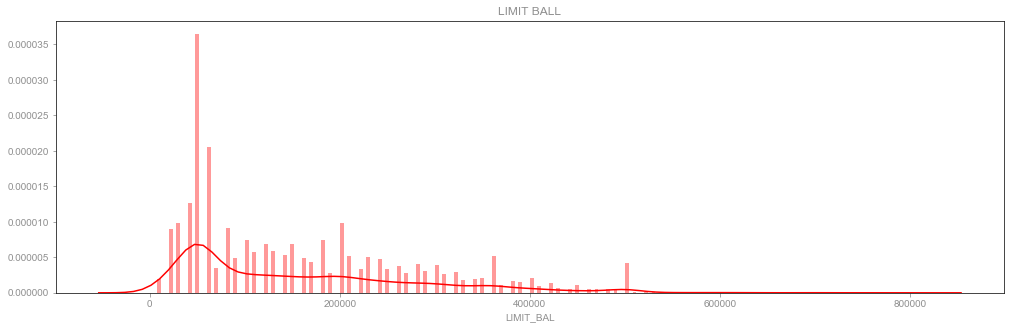

In [337]:
plt.figure(figsize = (17,5))
plt.title('LIMIT BALL')
sns.set_color_codes("bright")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="red")
plt.show()

In [272]:
df['LIMIT_BAL'].value_counts().sort_values(ascending=False).head()

50000.0     2426
60000.0     1365
40000.0      840
30000.0      651
200000.0     650
Name: LIMIT_BAL, dtype: int64

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


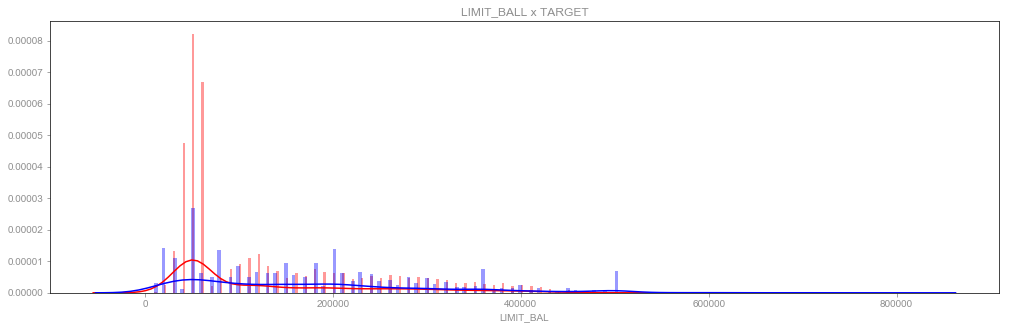

In [329]:
target_0 = df.loc[df['TARGET'] == 0]["LIMIT_BAL"]
target_1 = df.loc[df['TARGET'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (17,5))
plt.title('LIMIT_BALL x TARGET')
sns.set_color_codes("bright")
sns.distplot(target_1,kde=True,bins=200, color="red")
sns.distplot(target_0,kde=True,bins=200, color="blue")
plt.show()

***
LIMIT_BAL merupakan data numerik dengan nilai terbanyak adalah 5000 sebanyak 2426 kali
***

### MARIAGE (Status Pernikahan) 
1: Belum Menikah , 
2: Menikah , 
3: Lainnya

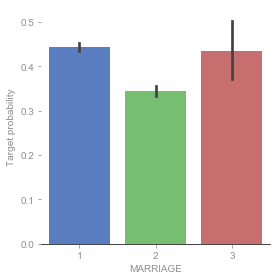

In [332]:
g  = sns.factorplot(x="MARRIAGE",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

***
Orang yang belum menikah dan orang dengan status lainnya memiliki peluang membayar kredit terlambat lebih besar
***

### Education (TIngakat Pendidikan) 
1: S2/S3 , 
2: Dipl/S1 , 
3: SMA , 
4: Lainnya , 

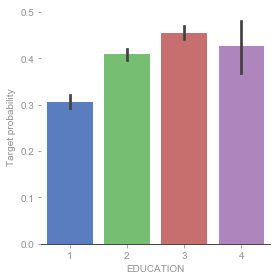

In [333]:
g  = sns.factorplot(x="EDUCATION",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

***
Orang yang berpendidikan terakhir SMA memiliki peluang membayar kredit terlambat lebih besar
***

### SEX (Jenis Kelamin) 
1: Pria , 
2: Wanita

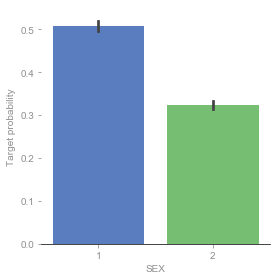

In [334]:
g  = sns.factorplot(x="SEX",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

***
Pria memiliki peluang membayar kredit terlambat lebih besar
***

### PAY (Keterlambatan per bulan)
0: Tepat waktu , 
1: Terlambat 1 bulan, dst

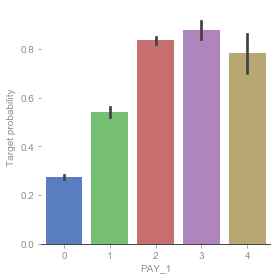

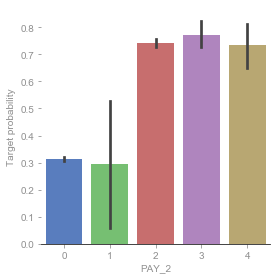

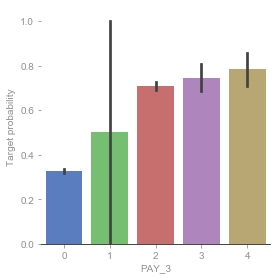

In [354]:
g  = sns.factorplot(x="PAY_1",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")
g  = sns.factorplot(x="PAY_2",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")
g  = sns.factorplot(x="PAY_3",y="TARGET",data=df,kind="bar", size = 4 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

***
Customer yang telat bayar kredit di bulan lalu cenderung memiliki peluang besar untuk telat membayar kredit juga di bulan depan.
***

### Korelasi Jumlah Tagihan

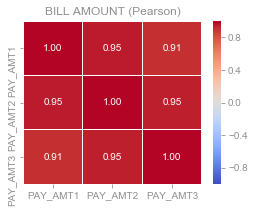

In [275]:
plt.figure(figsize=(4,3))
bil = ['BILL_AMT1','BILL_AMT2','BILL_AMT3']
plt.title('BILL AMOUNT (Pearson)')
bill_corr = df[bil].corr()
sns.heatmap(bill_corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

***
Korelasinya cukup tinggi
***

### Korelasi jumlah pembayaran

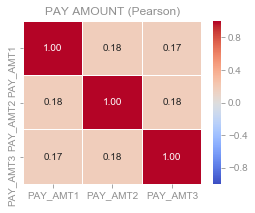

In [276]:
plt.figure(figsize=(4,3))
pay = ['PAY_AMT1','PAY_AMT2','PAY_AMT3']
plt.title('PAY AMOUNT (Pearson)')
pay_corr = df[pay].corr()
sns.heatmap(pay_corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

***
Korelasinya sangat kecil atau tidak ada korelasi
***

### MATRIX KORELASI 

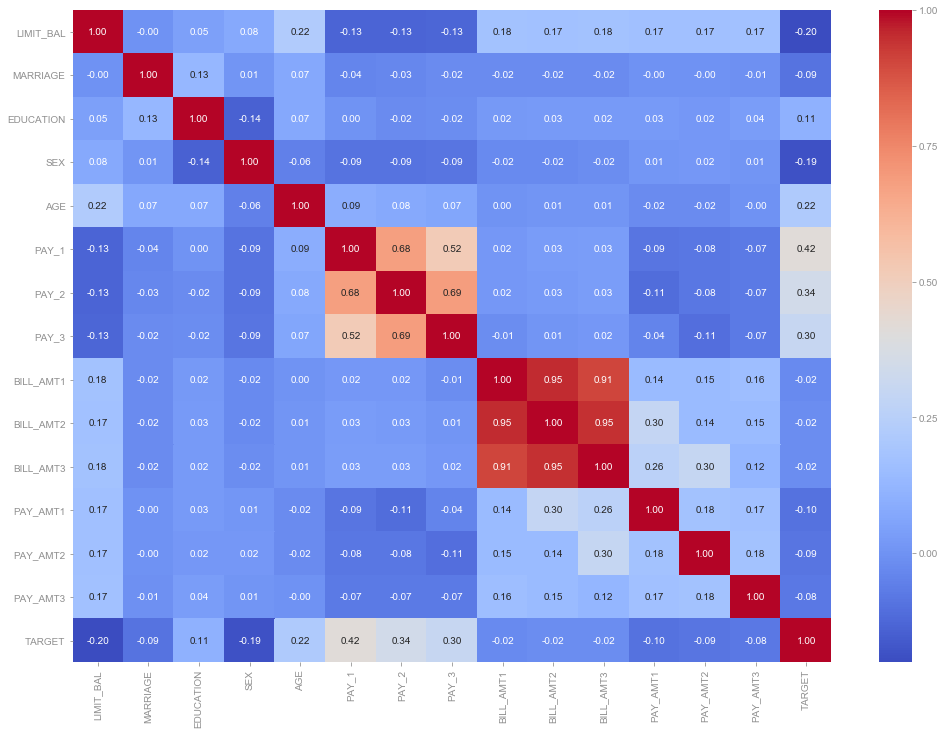

In [357]:
g=plt.figure(figsize=(17,12))
g = sns.heatmap(df.drop(['ID'], axis=1).corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

***
Yang korelasinya dengan target besar adalah Age, pay_1, pay_2, dan pay_3
***

# Prediktif Model

In [279]:
target = 'TARGET'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

## Split data Training dan Validasi

In [280]:
train_df, val_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

### Backup Data Training dan Validasi

In [281]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

In [282]:
train_df_bkp.shape

(13300, 16)

In [283]:
val_df_bkp.shape

(3325, 16)

***
# Random Forest
***

In [285]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, random_state=RANDOM_STATE, criterion=RFC_METRIC, n_estimators=NUM_ESTIMATORS, verbose=False)

### Training

In [286]:
clf.fit(df[predictors], df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

### Predict

In [287]:
preds = clf.predict(val_df[predictors])

### Feature Importance

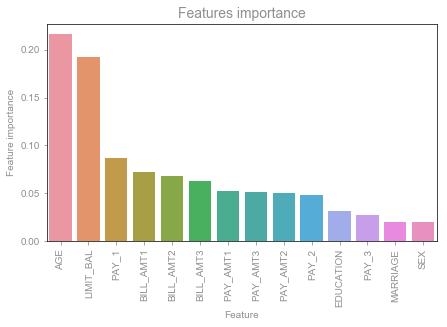

In [288]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

### Confusion Matrix

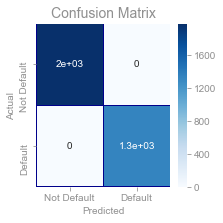

In [289]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(3,3))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Hitung area under curve (receiver operator characteristic)

In [290]:
roc_auc_score(val_df[target].values, preds)

1.0

## Simpan Model

In [291]:
from sklearn.externals import joblib

In [292]:
joblib.dump(clf, 'D:\TUNGGAL\PYTHON\Kredit-Skoring\RandomForrest.pkl')

['D:\\TUNGGAL\\PYTHON\\Kredit-Skoring\\RandomForrest.pkl']

## Tes Model

In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [294]:
test = pd.read_csv('testing.csv', delimiter=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [295]:
test_rf = test.drop(['ID'], axis=1)
test_rf.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


### Load Model

In [296]:
rf_model_load = joblib.load('RandomForrest.pkl')

In [298]:
test['TARGET_PRED'] = rf_model_load.predict(test_rf)

In [299]:
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET_PRED
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


***
# RandomForrest with OneHotEncoder
***

In [300]:
clf_ohe = RandomForestClassifier(n_jobs=NO_JOBS, random_state=RANDOM_STATE, criterion=RFC_METRIC, n_estimators=NUM_ESTIMATORS, verbose=False)

In [301]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3']

In [302]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [303]:
train_f_df.shape

(13300, 34)

In [304]:
val_f_df.shape

(3325, 33)

### Karena Kolom Beda, di align

In [305]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

In [306]:
train_fa_df.shape

(13300, 34)

In [307]:
val_fa_df.shape

(3325, 34)

In [308]:
train_fa_df.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'ID', 'LIMIT_BAL',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'SEX_1', 'SEX_2',
       'TARGET'],
      dtype='object')

### Target dan Prediktor

In [309]:
target_f = 'TARGET'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'LIMIT_BAL',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'SEX_1', 'SEX_2']

### Training

In [310]:
clf_ohe.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

### Predik

In [311]:
preds = clf_ohe.predict(val_fa_df[predictors_f])

### Feature Important

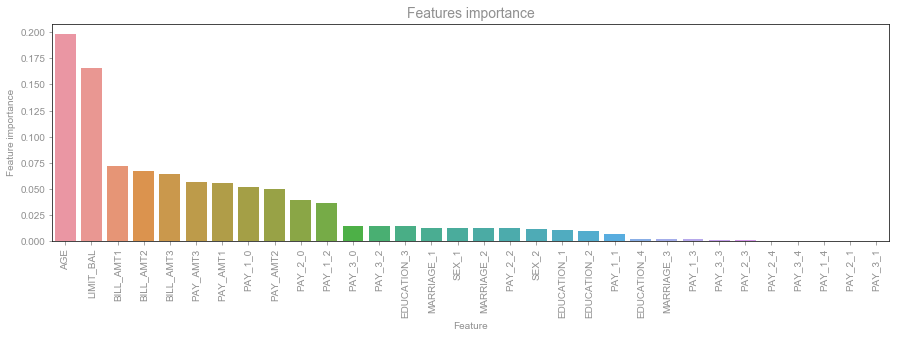

In [312]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf_ohe.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (15,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

### Confussion Matrix

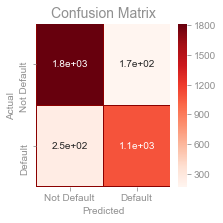

In [313]:
cm = pd.crosstab(val_fa_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(3,3))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkred", cmap="Reds")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [314]:
roc_auc_score(val_fa_df[target].values, preds)

0.8643264309855428

In [ ]:
clf.score(X_train,y_train))

# Simpan Model

In [315]:
from sklearn.externals import joblib

In [316]:
joblib.dump(clf_ohe, 'D:\TUNGGAL\PYTHON\Kredit-Skoring\RandomForrest_with_OneHotEncoder.pkl')

['D:\\TUNGGAL\\PYTHON\\Kredit-Skoring\\RandomForrest_with_OneHotEncoder.pkl']

# Tes Model

In [317]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [318]:
test = pd.read_csv('testing.csv', delimiter=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [319]:
test_rf_ohe = test[['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3']]
test_rf_ohe.head()

,EDUCATION,SEX,MARRIAGE,PAY_1,PAY_2,PAY_3
0,1,2,1,0,0,0
1,1,2,1,2,0,0
2,1,2,1,0,0,0
3,1,2,1,0,0,0
4,1,2,1,0,0,0


In [320]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3']

In [321]:
test_rf_ohe_dummies = pd.get_dummies(test, columns = cat_features)

In [322]:
test_rf_ohe_dummies.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4'],
      dtype='object')

In [323]:
test_rf_ohe_dummies = test_rf_ohe_dummies.drop(['ID'], axis=1)

In [324]:
test_rf_ohe_dummies.shape

(16625, 32)

### Load Model

In [325]:
rf_ohe_model_load = joblib.load('RandomForrest_with_OneHotEncoder.pkl')

In [326]:
test['TARGET_PRED'] = rf_ohe_model_load.predict(test_rf_ohe_dummies)

In [327]:
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET_PRED
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,1
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,1
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,1
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,1


***
Hasil Prediksi ada pada kolom TARGET_PRED
***

# NAIVE BAYES CLASSIFIER

In [361]:
df_nb = df[['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'TARGET']]
df_nb.head(3)

,EDUCATION,SEX,MARRIAGE,PAY_1,PAY_2,PAY_3,TARGET
0,1,2,1,0,0,0,0
1,1,2,1,1,2,0,0
2,1,2,1,0,0,0,0


In [362]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [364]:
feature_names = list(df.columns)
do_not_use_for_training = ['TARGET']

feature_names = [f for f in df_nb.columns if f not in do_not_use_for_training]

print('Total features : {}'.format(len(feature_names)))

df_nb[feature_names].count()
y = df['TARGET']

Total features : 6


In [366]:
z_train, z_test, y_train, y_test = train_test_split(df_nb[feature_names], y, test_size=0.3, random_state=1)

In [368]:
naive_bayes = MultinomialNB()
naive_bayes.fit(z_train, y_train)
predictions = naive_bayes.predict(z_test)

In [370]:
#Training Score
naive_bayes.score(z_train, y_train)

0.7276789550571453

In [372]:
#Testing Score
naive_bayes.score(z_test, y_test)

0.7277465918203689

## Simpan Model

In [373]:
from sklearn.externals import joblib

In [385]:
joblib.dump(naive_bayes, 'NaiveBayes.pkl')

['NaiveBayes.pkl']

## Tes Model

In [386]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [390]:
test_nb = pd.read_csv('testing.csv', delimiter=';')
test_nb_cat = test[['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3']]
test_nb_cat.head(3)

,EDUCATION,SEX,MARRIAGE,PAY_1,PAY_2,PAY_3
0,1,2,1,0,0,0
1,1,2,1,2,0,0
2,1,2,1,0,0,0


In [392]:
nb_model_load = joblib.load('NaiveBayes.pkl')

In [394]:
test_nb['TARGET_PRED'] = nb_model_load.predict(test_nb_cat)

In [395]:
test_nb.head(3)

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET_PRED
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,1
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0


***
# \/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
***